# **Exercise 3 (Group 9)**


In this exercise, we are to do the following:
- Form a group of choice consisting of 4-6 participants and carefully select our group members.
- Summarize the covid-19 data by regions
- Test each region against others to test if their average death number from covid-19 is the same
- Present our tests as Data Scientists and upload your final code and conclusion onto the google drive under your group's name.

------

We start by reading our dataset as a dataframe below.

In [14]:
#Importing the necessary libraries
library(dplyr)
library(tidyverse)
library(ggplot2)

In [15]:
#Reading and loading our covid-19 dataset into our notebook
covid_data <- read.csv("/content/covid_19.csv")

Next, we view our dataframe, check for null values, check for duplicat and the structure of our dataframe.

In [16]:
#viewing and checking the structure of our dataset
view(covid_data)
str(covid_data) #checking for the structure of our dataset
length(names(covid_data)) #checking for the number of columns in our dataset
sum(is.na(covid_data)) #checking for number of null values
sum(covid_data[duplicated(covid_data), ]) #checking for the number of duplicate values.

'data.frame':	4100 obs. of  11 variables:
 $ X               : int  1 2 3 4 5 6 7 8 9 10 ...
 $ states          : chr  "Abia" "Adamawa" "Akwa Ibom" "Anambra" ...
 $ total_confirmed : int  2121 1157 4487 2489 1851 1290 1907 1532 696 4705 ...
 $ new_confirmed   : int  77 0 59 43 25 4 0 176 6 144 ...
 $ total_recoveries: int  2010 1098 4349 2405 1791 1226 1512 1317 654 2556 ...
 $ new_recoveries  : int  8 0 31 19 15 10 0 0 23 0 ...
 $ total_death     : int  33 32 44 19 23 28 25 38 25 110 ...
 $ new_death       : int  2 0 0 0 0 0 0 0 0 0 ...
 $ week            : chr  "2021-12-26" "2021-12-26" "2021-12-26" "2021-12-26" ...
 $ day             : chr  "Sunday" "Sunday" "Sunday" "Sunday" ...
 $ month           : chr  "December" "December" "December" "December" ...


[1] 11

[1] 0

[1] 0

From the above result, our dataset consists of 11 columns with 4 of them being character datatypes and 7 of them being integers.
Our also dataset contains 0 null and no duplicates.

To summarize our covid data by regions, we assign each state to their regions and create a new column that contains these regions as an identity of the states.

In [17]:
# summarizing the covid data by regions and creating a new column, "region" and assigning the various states to their unique region.
covid_data <- covid_data %>%
  mutate(region = sapply(states, function(x) {
    if (x %in% c('Benue','Kogi','Kwara','Nasarawa','Niger','Plateau','FCT')) {
      'North Central'
    } else if (x %in% c('Adamawa','Bauchi','Borno','Gombe','Taraba','Yobe')) {
      'North East'
    } else if (x %in% c('Jigawa','Kaduna','Kano','Katsina','Kebbi','Sokoto','Zamfara')) {
      'North West'
    } else if (x %in% c('Abia','Anambra','Ebonyi','Enugu','Imo')) {
      'South East'
    } else if (x %in% c('Akwa Ibom','Bayelsa','Cross River','Delta','Edo','Rivers')) {
      'South South'
    } else if (x %in% c('Ekiti','Lagos','Ogun','Ondo','Osun','Oyo')) {
      'South West'
    } else {
      NA  # Default case if state is not found
    }
  }))

Checking our covid data to ensure that the region column has been added

In [18]:
#checking for the first 6 rows in our data after creating the region column
head(covid_data)

,X,states,total_confirmed,new_confirmed,total_recoveries,new_recoveries,total_death,new_death,week,day,month,region
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,1,Abia,2121,77,2010,8,33,2,2021-12-26,Sunday,December,South East
2,2,Adamawa,1157,0,1098,0,32,0,2021-12-26,Sunday,December,North East
3,3,Akwa Ibom,4487,59,4349,31,44,0,2021-12-26,Sunday,December,South South
4,4,Anambra,2489,43,2405,19,19,0,2021-12-26,Sunday,December,South East
5,5,Bauchi,1851,25,1791,15,23,0,2021-12-26,Sunday,December,North East
6,6,Bayelsa,1290,4,1226,10,28,0,2021-12-26,Sunday,December,South South


Warning message in geom_histogram(notch = TRUE, fill = "gold", colour = "gold", :
“Ignoring unknown parameters: `notch`”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


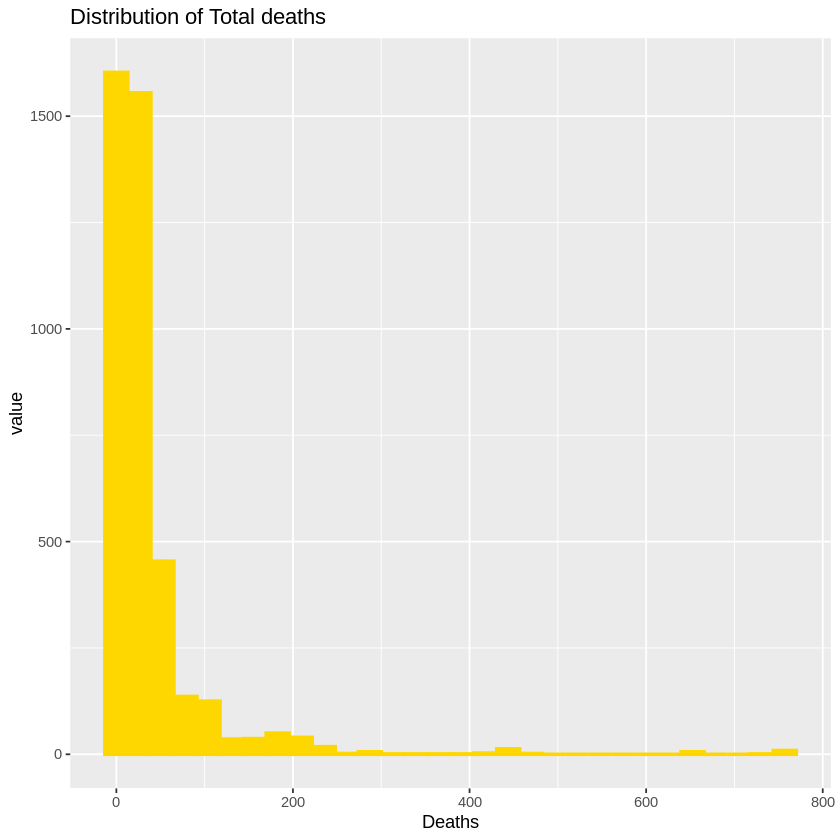

In [35]:
covid_19_death_plot <- ggplot(covid_data,aes(total_death))+
  geom_histogram( notch = TRUE, fill = "gold", colour = 'gold', size = 1)+
  labs(title = "Distribution of Total deaths") +
  xlab("Deaths") + ylab("value")


covid_19_death_plot

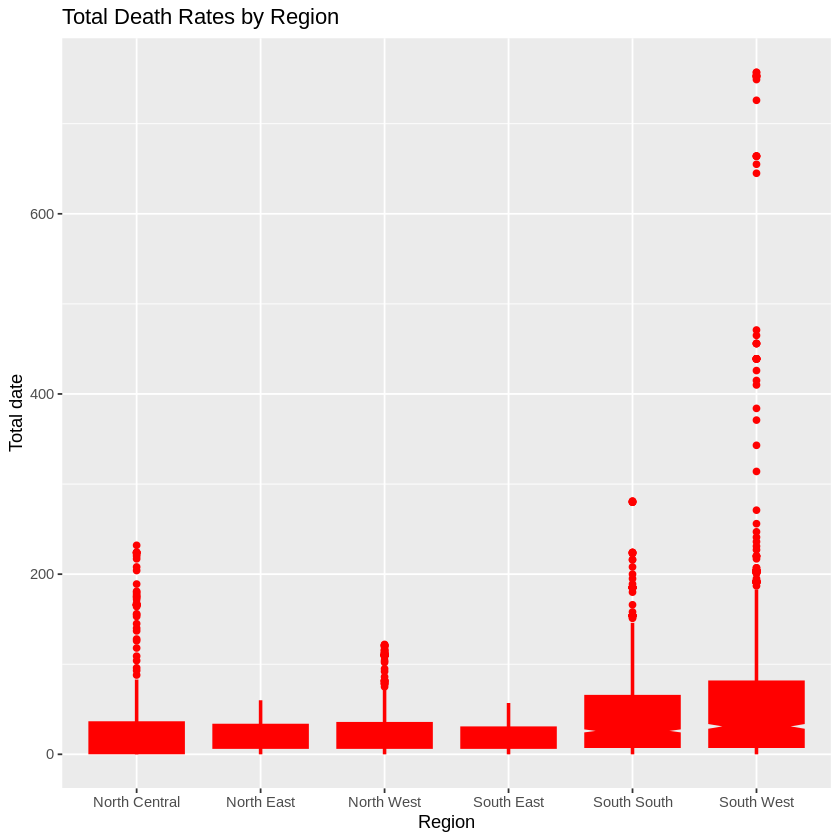

In [33]:
covid_19_reg_box <- ggplot(covid_data,aes(x = region,y =total_death))+
  geom_boxplot( notch = TRUE, fill = "red", colour = 'red', size = 1)+
  labs(title = "Total Death Rates by Region") +
  xlab("Region") + ylab("Total date")


covid_19_reg_box

Seeing that data has been grouped by region, we consider carrying our hypothesis.

Our hypothesis test seeks to test each region against others to see if their average death number (mean death) from covid-19 is the same.
To achieve this, we subset the columns we will need for this task which are: region and total_death column.

In [19]:
#subsetting our dataframe for the region and total deaths to aid our hypothesis testing
sub_covid_19 <- covid_data %>%
  select(region,total_death)
sub_covid_19

region,total_death
<chr>,<int>
South East,33
North East,32
South South,44
South East,19
North East,23
South South,28
North Central,25
North East,38
South South,25


Having subsetted our data, we make use of ANOVA to check if there is a significant difference between the mean of the six different regions. Upon doing this, based on our result, we perform post hoc tests to examine the significance of our ANOVA results for the regions against each other.

In [20]:
#using anova to test our hypothesis
anova_result <- aov(total_death ~ region, data = sub_covid_19)
summary(anova_result) #observing the results/summary of our hypothesis testing

              Df   Sum Sq Mean Sq F value Pr(>F)    
region         5  1786769  357354   91.22 <2e-16 ***
Residuals   4094 16038541    3918                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [21]:
#performing post hoc test using turkey HSD to understand specific differences between the mean of each regions after determining that there is a significant overall difference.
tukey_result <- TukeyHSD(anova_result)

tukey_result

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = total_death ~ region, data = sub_covid_19)

$region
                                diff        lwr       upr     p adj
North East-North Central  -10.115722 -19.574273 -0.657172 0.0279505
North West-North Central   -3.483692 -12.543109  5.575725 0.8830174
South East-North Central  -11.592658 -21.534032 -1.651284 0.0115155
South South-North Central  19.139010   9.664873 28.613147 0.0000002
South West-North Central   48.654239  39.282231 58.026248 0.0000000
North West-North East       6.632030  -2.815332 16.079392 0.3415416
South East-North East      -1.476936 -11.773077  8.819205 0.9985382
South South-North East     29.254732  19.408978 39.100487 0.0000000
South West-North East      58.769962  49.022441 68.517482 0.0000000
South East-North West      -8.108966 -18.039695  1.821764 0.1829583
South South-North West     22.622703  13.159736 32.085669 0.0000000
South West-North West      52.137932 

Finally, our results will be further explained [here]().

To better understand and see our results, we group our regions by the mean average death as seen below

In [23]:
#Confirming our results by the mean of each group
summary_group <- covid_data %>%
  group_by(region) %>%
  summarise(
    avg_death = mean(total_death)
  )

Next, we sort this mean death in ascending order.

In [24]:
#reordering our summarized data in ascending order

summary_group_sorted <- summary_group[order(summary_group$avg_death), ]

summary_group_sorted$region <- factor(summary_group_sorted$region, levels = summary_group_sorted$region)
summary_group_sorted

region,avg_death
<fct>,<dbl>
South East,17.73551
North East,19.21244
North West,25.84447
North Central,29.32817
South South,48.46718
South West,77.98240


We plot the region by their average death, and return this visual

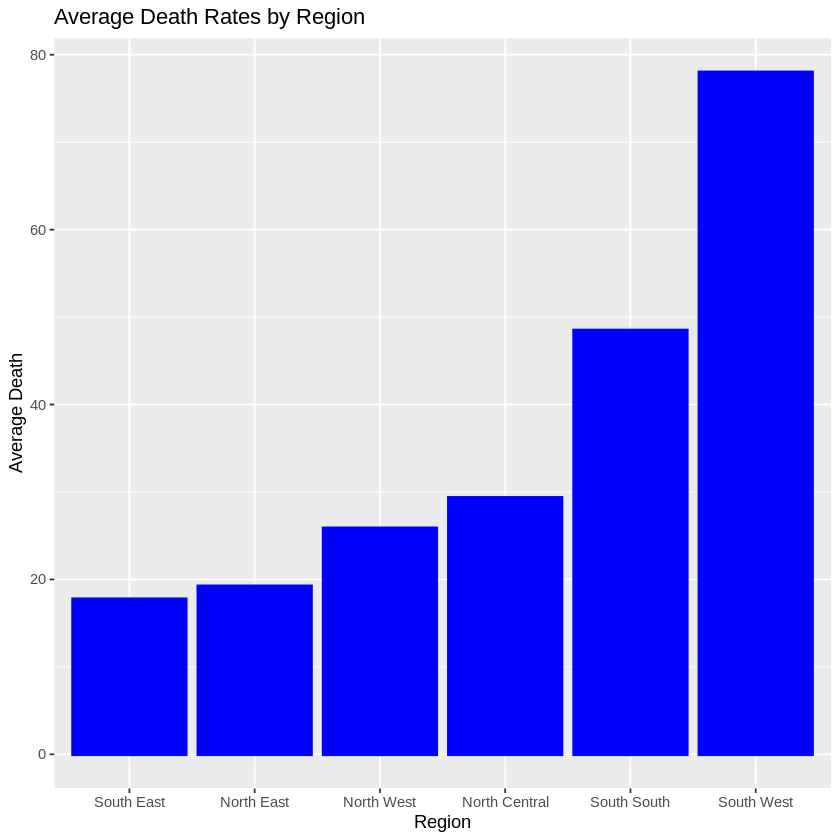

In [25]:
#plotting the mean value of each region
covid_19_reg_avg <- ggplot(summary_group_sorted,aes(x = region,y =avg_death))+
  geom_bar(stat = 'identity', fill = "blue", colour = 'blue', size = 1)+
  labs(title = "Average Death Rates by Region") +
  xlab("Region") + ylab("Average Death")


covid_19_reg_avg

For detailed explanation, result, report and recommendation, kindly see the attached document 

The end..........
